# Experiment 8: Support Vector Machines (SVMs) and the Kernel Trick

Data Loading and Preprocessing 


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Dataset Shape:
X shape: (500, 2)
y shape: (500,)

Class distribution:
Class 0: 250 samples
Class 1: 250 samples


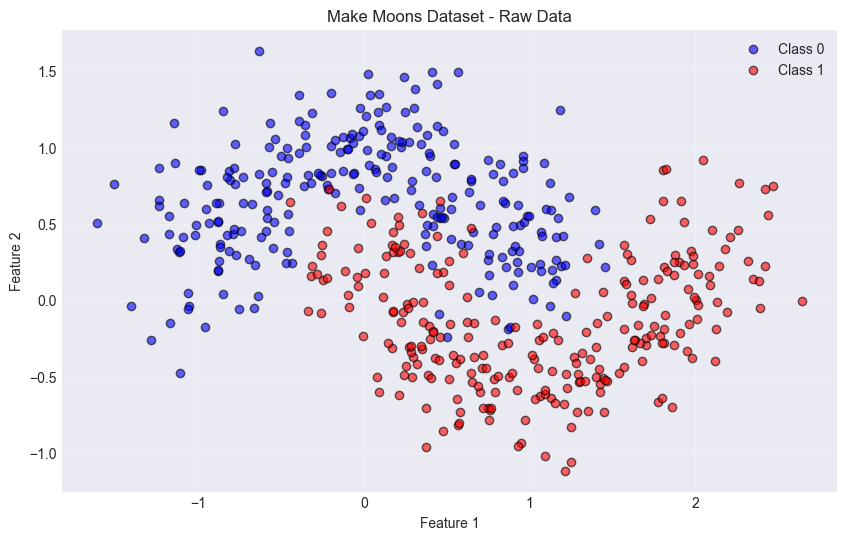

In [2]:
# Step 1: Generate the make_moons dataset
# Generate 500 samples with noise to make it challenging
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

print("Dataset Shape:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nClass distribution:")
print(f"Class 0: {np.sum(y == 0)} samples")
print(f"Class 1: {np.sum(y == 1)} samples")

# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Dataset - Raw Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
# Step 2: Create Hold-Out Set (70/30 split)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print("Train-Validation Split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"\nTraining set class distribution:")
print(f"Class 0: {np.sum(y_train == 0)} samples")
print(f"Class 1: {np.sum(y_train == 1)} samples")
print(f"\nValidation set class distribution:")
print(f"Class 0: {np.sum(y_val == 0)} samples")
print(f"Class 1: {np.sum(y_val == 1)} samples")

Train-Validation Split:
X_train shape: (350, 2)
X_val shape: (150, 2)
y_train shape: (350,)
y_val shape: (150,)

Training set class distribution:
Class 0: 175 samples
Class 1: 175 samples

Validation set class distribution:
Class 0: 75 samples
Class 1: 75 samples


Feature Standardization:

Original X_train statistics:
Mean: [0.50307678 0.23972907]
Std: [0.90870078 0.58199774]

Scaled X_train_scaled statistics:
Mean: [2.49245069e-16 1.66533454e-18]
Std: [1. 1.]


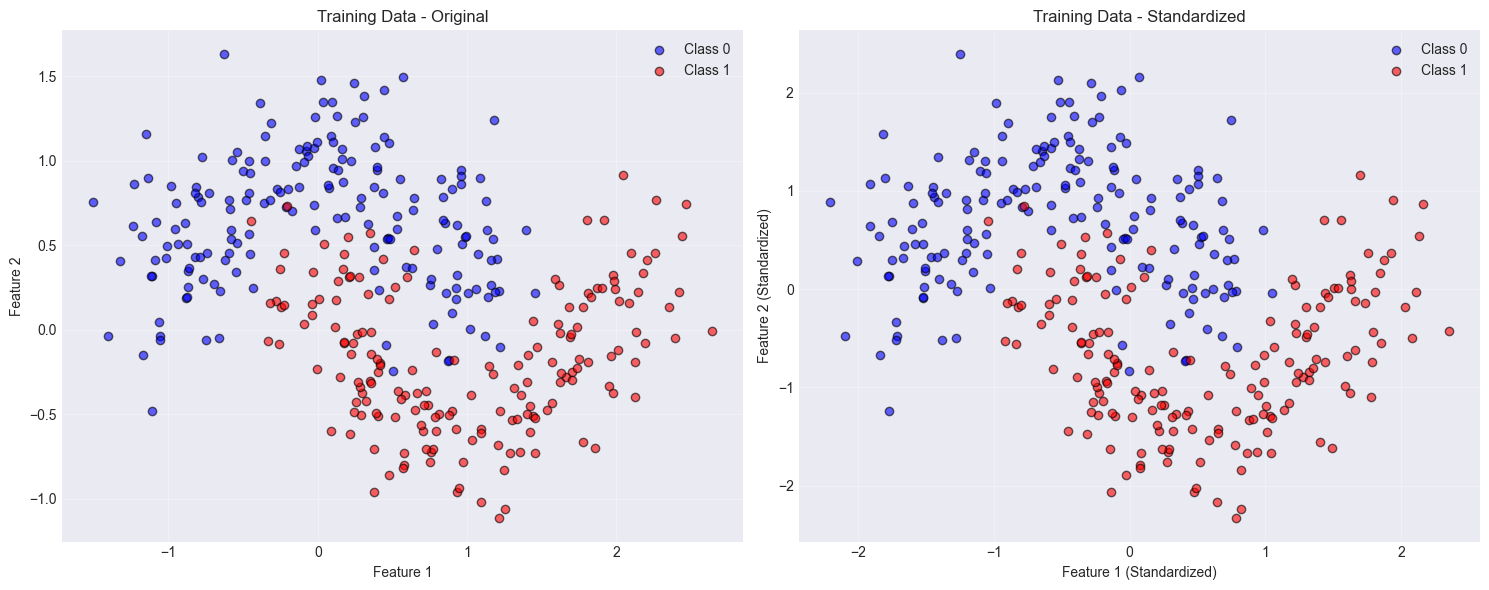

In [4]:
# Step 3: Standardize Features
# Fit the scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Feature Standardization:")
print(f"\nOriginal X_train statistics:")
print(f"Mean: {X_train.mean(axis=0)}")
print(f"Std: {X_train.std(axis=0)}")
print(f"\nScaled X_train_scaled statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0)}")
print(f"Std: {X_train_scaled.std(axis=0)}")

# Visualize scaled data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original data
axes[0].scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
                c='blue', label='Class 0', alpha=0.6, edgecolors='k')
axes[0].scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
                c='red', label='Class 1', alpha=0.6, edgecolors='k')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Training Data - Original')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scaled data
axes[1].scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], 
                c='blue', label='Class 0', alpha=0.6, edgecolors='k')
axes[1].scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], 
                c='red', label='Class 1', alpha=0.6, edgecolors='k')
axes[1].set_xlabel('Feature 1 (Standardized)')
axes[1].set_ylabel('Feature 2 (Standardized)')
axes[1].set_title('Training Data - Standardized')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Linear SVM

In [5]:
# Train Linear SVM
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_val_scaled)

# Evaluate the model
linear_accuracy = accuracy_score(y_val, y_pred_linear)

print("=" * 60)
print("LINEAR SVM MODEL EVALUATION")
print("=" * 60)
print(f"\nValidation Accuracy: {linear_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_linear, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
cm_linear = confusion_matrix(y_val, y_pred_linear)
print(f"\nConfusion Matrix:")
print(cm_linear)

LINEAR SVM MODEL EVALUATION

Validation Accuracy: 0.8533

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.86        75
     Class 1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150


Confusion Matrix:
[[65 10]
 [12 63]]


### Analysis: Why Linear SVM Fails

**Explanation:**
The linear SVM cannot achieve perfect accuracy because the "moons" dataset is **non-linearly separable**. A linear classifier can only draw a straight line (or hyperplane in higher dimensions) to separate the classes. However, the two moon-shaped clusters cannot be separated by any single straight line.

---

## The Kernel Trick


In [6]:
# Model 2: RBF Kernel SVM
rbf_model = SVC(kernel='rbf', random_state=42)  # C=1.0 and gamma='scale' by default
rbf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rbf = rbf_model.predict(X_val_scaled)

# Evaluate the model
rbf_accuracy = accuracy_score(y_val, y_pred_rbf)

print("=" * 60)
print("RBF KERNEL SVM MODEL EVALUATION")
print("=" * 60)
print(f"\nValidation Accuracy: {rbf_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_rbf, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
cm_rbf = confusion_matrix(y_val, y_pred_rbf)
print(f"\nConfusion Matrix:")
print(cm_rbf)

RBF KERNEL SVM MODEL EVALUATION

Validation Accuracy: 0.9467

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.99      0.95        75
     Class 1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


Confusion Matrix:
[[74  1]
 [ 7 68]]


In [7]:
# Model 3: Polynomial Kernel SVM
poly_model = SVC(kernel='poly', degree=3, random_state=42)  # degree=3 by default
poly_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_val_scaled)

# Evaluate the model
poly_accuracy = accuracy_score(y_val, y_pred_poly)

print("=" * 60)
print("POLYNOMIAL KERNEL SVM MODEL EVALUATION")
print("=" * 60)
print(f"\nValidation Accuracy: {poly_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_poly, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
cm_poly = confusion_matrix(y_val, y_pred_poly)
print(f"\nConfusion Matrix:")
print(cm_poly)

POLYNOMIAL KERNEL SVM MODEL EVALUATION

Validation Accuracy: 0.8733

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.93      0.88        75
     Class 1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150


Confusion Matrix:
[[70  5]
 [14 61]]



MODEL COMPARISON TABLE
                    Model Kernel Validation Accuracy
       Linear SVM (C=1.0) linear              0.8533
        RBF SVM (default)    rbf              0.9467
Polynomial SVM (degree=3)   poly              0.8733


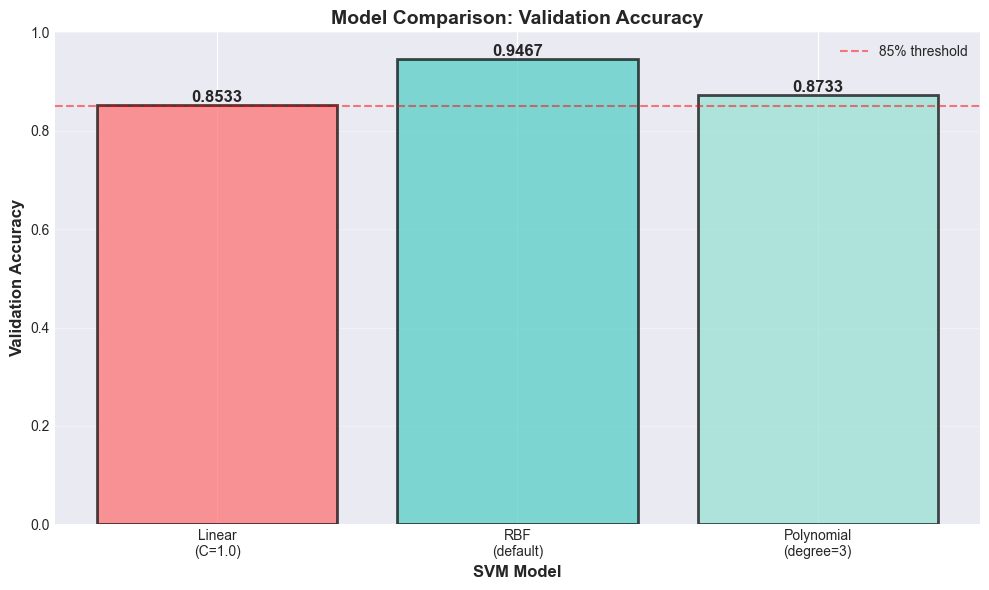

In [8]:
# Model Comparison Table
comparison_data = {
    'Model': ['Linear SVM (C=1.0)', 'RBF SVM (default)', 'Polynomial SVM (degree=3)'],
    'Kernel': ['linear', 'rbf', 'poly'],
    'Validation Accuracy': [linear_accuracy, rbf_accuracy, poly_accuracy]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Validation Accuracy'] = comparison_df['Validation Accuracy'].apply(lambda x: f"{x:.4f}")

print("\n" + "=" * 60)
print("MODEL COMPARISON TABLE")
print("=" * 60)
print(comparison_df.to_string(index=False))
print("=" * 60)

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))
accuracies = [linear_accuracy, rbf_accuracy, poly_accuracy]
models = ['Linear\n(C=1.0)', 'RBF\n(default)', 'Polynomial\n(degree=3)']
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']

bars = ax.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax.set_xlabel('SVM Model', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: Validation Accuracy', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1.0])
ax.axhline(y=0.85, color='red', linestyle='--', alpha=0.5, label='85% threshold')
ax.grid(axis='y', alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

**Best Performing Kernel:**
The **RBF (Radial Basis Function) kernel** typically performs best 

---

Grid Search

In [9]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

print("Parameter Grid for GridSearchCV:")
print("=" * 60)
for param, values in param_grid.items():
    print(f"{param}: {values}")
print("=" * 60)
print(f"\nTotal combinations to test: {len(param_grid['C']) * len(param_grid['gamma'])}")
print("Cross-validation folds: 5")
print(f"Total model fits: {len(param_grid['C']) * len(param_grid['gamma']) * 5}")

Parameter Grid for GridSearchCV:
C: [0.1, 1, 10, 100]
gamma: [0.1, 1, 10, 100]
kernel: ['rbf']

Total combinations to test: 16
Cross-validation folds: 5
Total model fits: 80


In [10]:
# Setup and run GridSearchCV
grid = GridSearchCV(
    SVC(random_state=42), 
    param_grid, 
    refit=True,
    verbose=2,
    cv=5,
    scoring='accuracy'
)

print("\nStarting GridSearchCV...")
print("This may take a moment...\n")

# Fit the grid search
grid.fit(X_train_scaled, y_train)

print("\n" + "=" * 60)
print("GRID SEARCH COMPLETED!")
print("=" * 60)


Starting GridSearchCV...
This may take a moment...

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   

In [11]:
# Analyze Grid Search Results
print("\nBest Parameters Found:")
print("=" * 60)
for param, value in grid.best_params_.items():
    print(f"{param}: {value}")
print("=" * 60)

print(f"\nBest Cross-Validated Accuracy: {grid.best_score_:.4f}")
print(f"Best Estimator: {grid.best_estimator_}")

# Get all results
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results_df = results_df.sort_values('rank_test_score')
results_df.columns = ['C', 'gamma', 'Mean CV Score', 'Std CV Score', 'Rank']

print("\n" + "=" * 60)
print("TOP 10 PARAMETER COMBINATIONS")
print("=" * 60)
print(results_df.head(10).to_string(index=False))
print("=" * 60)


Best Parameters Found:
C: 1
gamma: 1
kernel: rbf

Best Cross-Validated Accuracy: 0.9514
Best Estimator: SVC(C=1, gamma=1, random_state=42)

TOP 10 PARAMETER COMBINATIONS
    C  gamma  Mean CV Score  Std CV Score  Rank
  1.0    1.0       0.951429      0.026496     1
  1.0   10.0       0.945714      0.024578     2
100.0    0.1       0.942857      0.023905     3
  0.1   10.0       0.937143      0.021381     4
 10.0    1.0       0.937143      0.019378     4
100.0    1.0       0.931429      0.027701     6
  0.1    1.0       0.928571      0.020203     7
 10.0   10.0       0.925714      0.020996     8
100.0   10.0       0.914286      0.012778     9
 10.0    0.1       0.894286      0.026496    10


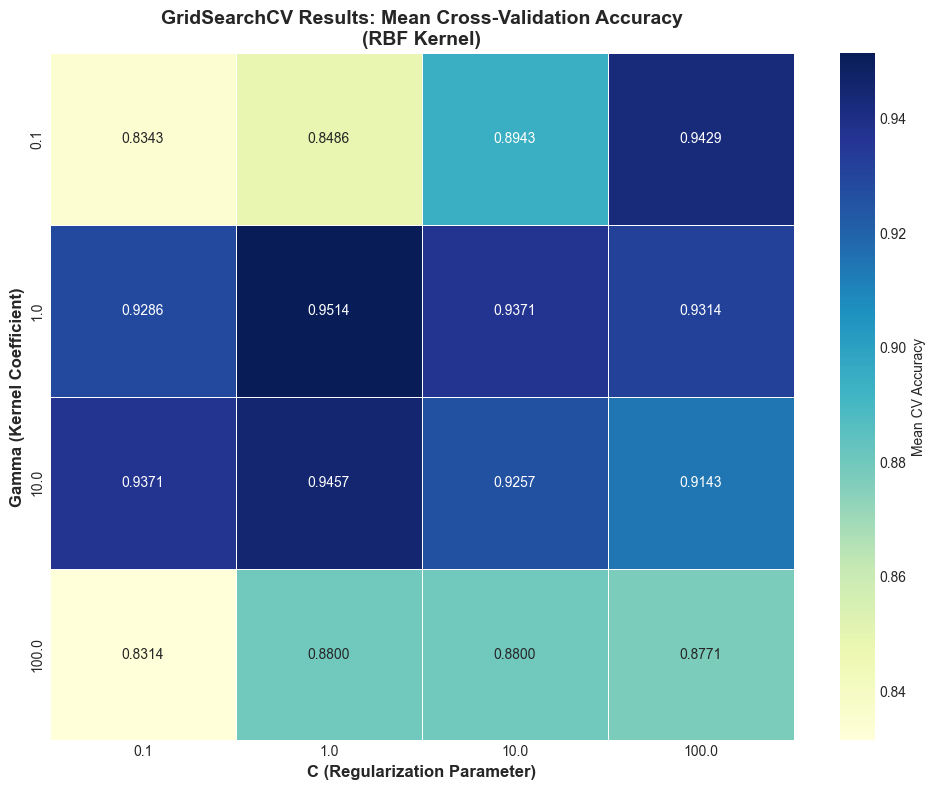

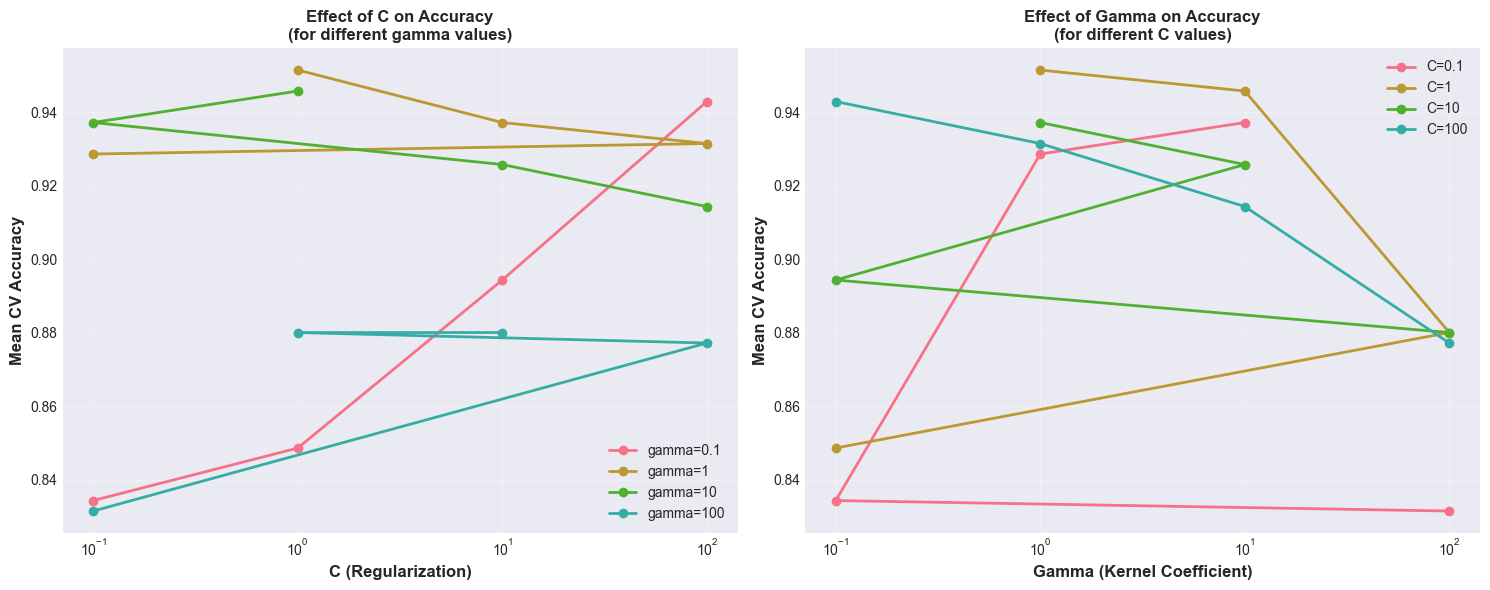

In [12]:
# Visualize Grid Search Results
# Create a heatmap of mean CV scores
pivot_table = results_df.pivot_table(
    values='Mean CV Score', 
    index='gamma', 
    columns='C'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlGnBu', 
            cbar_kws={'label': 'Mean CV Accuracy'}, linewidths=0.5)
plt.title('GridSearchCV Results: Mean Cross-Validation Accuracy\n(RBF Kernel)', 
          fontsize=14, fontweight='bold')
plt.xlabel('C (Regularization Parameter)', fontsize=12, fontweight='bold')
plt.ylabel('Gamma (Kernel Coefficient)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Line plot showing effect of C and gamma
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Effect of C for different gamma values
for gamma_val in param_grid['gamma']:
    subset = results_df[results_df['gamma'] == gamma_val]
    axes[0].plot(subset['C'], subset['Mean CV Score'], 
                marker='o', label=f'gamma={gamma_val}', linewidth=2)

axes[0].set_xlabel('C (Regularization)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Mean CV Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Effect of C on Accuracy\n(for different gamma values)', 
                 fontsize=12, fontweight='bold')
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Effect of gamma for different C values
for c_val in param_grid['C']:
    subset = results_df[results_df['C'] == c_val]
    axes[1].plot(subset['gamma'], subset['Mean CV Score'], 
                marker='o', label=f'C={c_val}', linewidth=2)

axes[1].set_xlabel('Gamma (Kernel Coefficient)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Mean CV Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Effect of Gamma on Accuracy\n(for different C values)', 
                 fontsize=12, fontweight='bold')
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Evaluation and Visualization

In [13]:
# Final Model Evaluation on Hold-Out Set
final_predictions = grid.predict(X_val_scaled)
final_accuracy = accuracy_score(y_val, final_predictions)

print("=" * 60)
print("FINAL MODEL EVALUATION (GridSearchCV Best Model)")
print("=" * 60)
print(f"\nBest Parameters: C={grid.best_params_['C']}, gamma={grid.best_params_['gamma']}")
print(f"Validation Accuracy: {final_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, final_predictions, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
cm_final = confusion_matrix(y_val, final_predictions)
print(f"\nConfusion Matrix:")
print(cm_final)

FINAL MODEL EVALUATION (GridSearchCV Best Model)

Best Parameters: C=1, gamma=1
Validation Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        75
     Class 1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Confusion Matrix:
[[75  0]
 [ 5 70]]


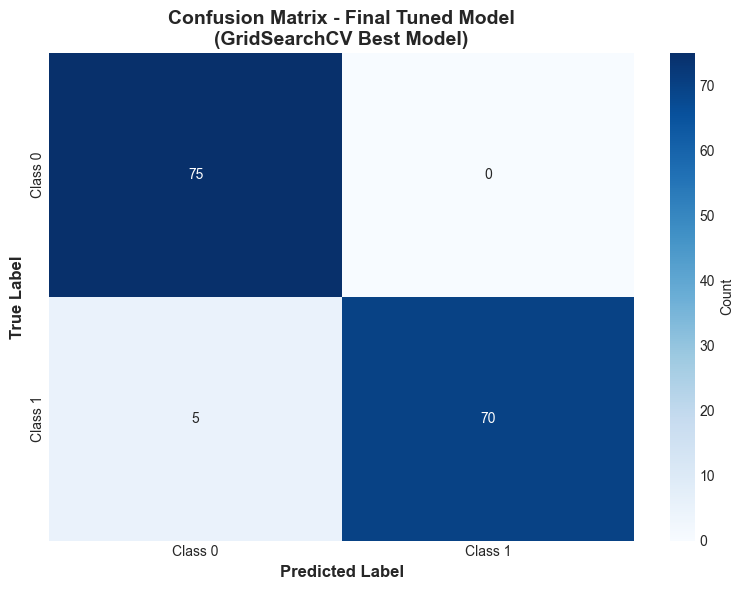


Additional Metrics:
True Negatives: 75
False Positives: 0
False Negatives: 5
True Positives: 70

Precision: 1.0000
Recall: 0.9333
F1-Score: 0.9655


In [14]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'],
            cbar_kws={'label': 'Count'})
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Final Tuned Model\n(GridSearchCV Best Model)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate additional metrics
tn, fp, fn, tp = cm_final.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nAdditional Metrics:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [15]:
# Helper function to plot decision boundaries
def plot_decision_boundary(model, X, y, title, ax):

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create mesh grid
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    contour = ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    
    # Plot training points
    scatter = ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], 
                        c='blue', label='Class 0', alpha=0.8, 
                        edgecolors='k', s=50)
    scatter = ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
                        c='red', label='Class 1', alpha=0.8, 
                        edgecolors='k', s=50)
    
    # Plot support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s=200, linewidth=1.5, facecolors='none', edgecolors='black',
                  label='Support Vectors')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1 (Standardized)', fontweight='bold')
    ax.set_ylabel('Feature 2 (Standardized)', fontweight='bold')
    ax.set_title(title, fontweight='bold', fontsize=11)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    return contour

print("Decision boundary plotting function defined successfully!")

Decision boundary plotting function defined successfully!


Plotting Linear SVM decision boundary...
Plotting Default RBF SVM decision boundary...
Plotting Tuned RBF SVM decision boundary...


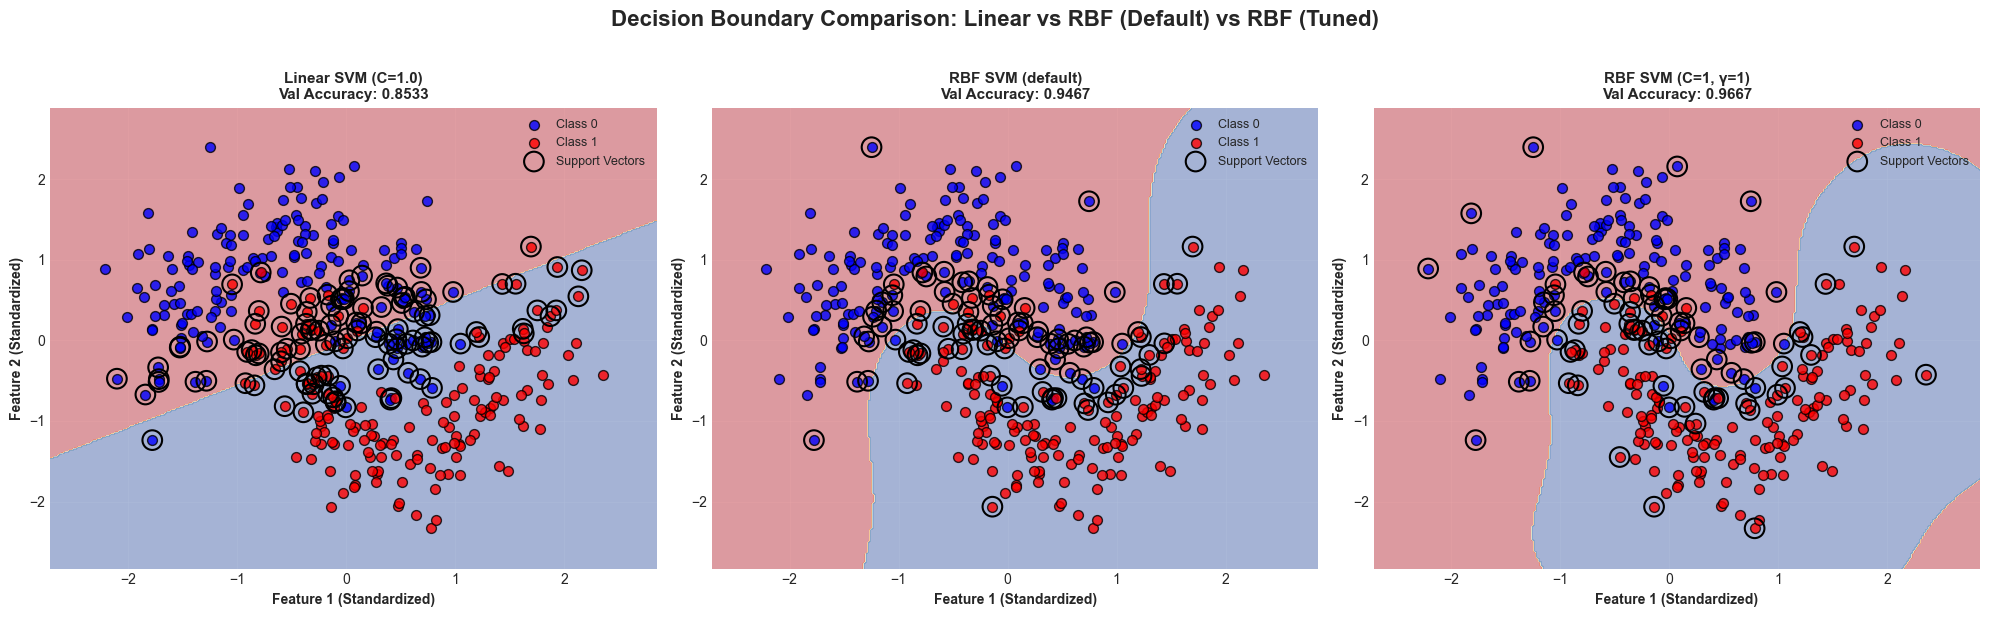


Decision boundary visualization complete!


In [16]:
# Create 1x3 subplot showing decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Linear SVM
print("Plotting Linear SVM decision boundary...")
plot_decision_boundary(
    linear_model, 
    X_train_scaled, 
    y_train,
    f'Linear SVM (C=1.0)\nVal Accuracy: {linear_accuracy:.4f}',
    axes[0]
)

# Plot 2: Default RBF SVM
print("Plotting Default RBF SVM decision boundary...")
plot_decision_boundary(
    rbf_model, 
    X_train_scaled, 
    y_train,
    f'RBF SVM (default)\nVal Accuracy: {rbf_accuracy:.4f}',
    axes[1]
)

# Plot 3: Tuned RBF SVM (GridSearchCV)
print("Plotting Tuned RBF SVM decision boundary...")
plot_decision_boundary(
    grid.best_estimator_, 
    X_train_scaled, 
    y_train,
    f'RBF SVM (C={grid.best_params_["C"]}, γ={grid.best_params_["gamma"]})\nVal Accuracy: {final_accuracy:.4f}',
    axes[2]
)

plt.suptitle('Decision Boundary Comparison: Linear vs RBF (Default) vs RBF (Tuned)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nDecision boundary visualization complete!")

### Model Comparison Table


COMPREHENSIVE MODEL COMPARISON - VALIDATION ACCURACY
                                 Model Kernel  Validation Accuracy
              SVC (kernel=linear, C=1) linear             0.853333
      SVC (kernel=rbf, default params)    rbf             0.946667
           SVC (kernel=poly, degree=3)   poly             0.873333
GridSearchCV Best Model (C=1, gamma=1)    rbf             0.966667


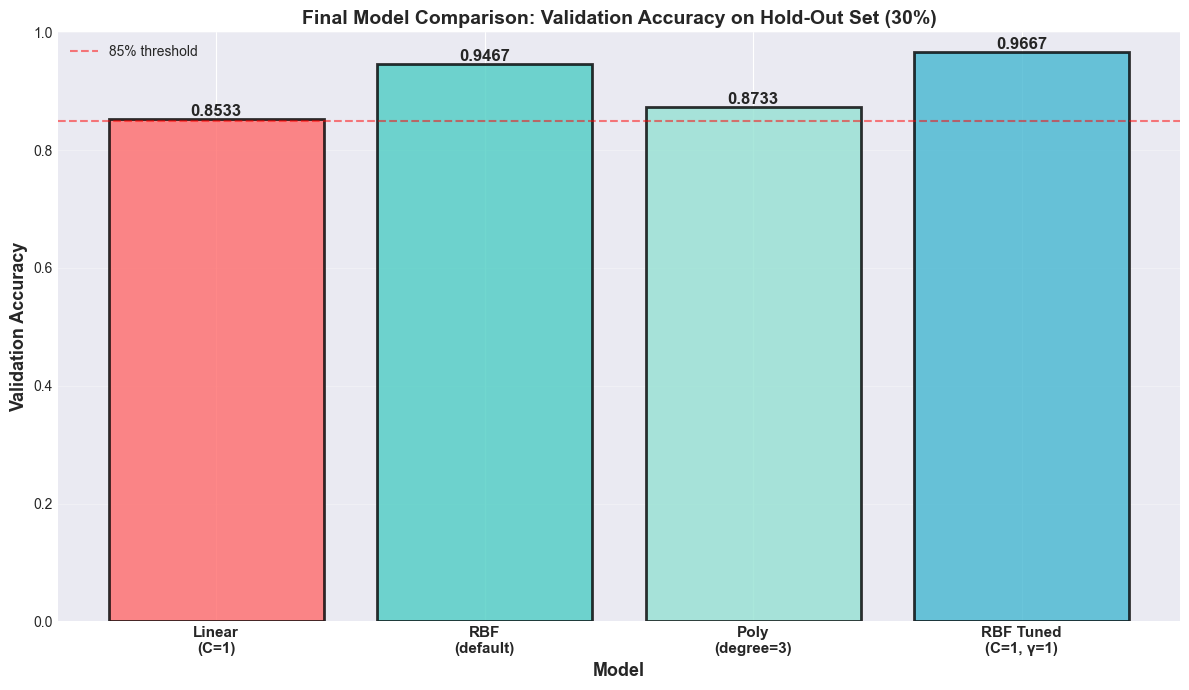

In [17]:
# Create comprehensive model comparison table
final_comparison_data = {
    'Model': [
        'SVC (kernel=linear, C=1)',
        'SVC (kernel=rbf, default params)',
        'SVC (kernel=poly, degree=3)',
        f'GridSearchCV Best Model (C={grid.best_params_["C"]}, gamma={grid.best_params_["gamma"]})'
    ],
    'Kernel': ['linear', 'rbf', 'poly', 'rbf'],
    'Validation Accuracy': [linear_accuracy, rbf_accuracy, poly_accuracy, final_accuracy]
}

final_comparison_df = pd.DataFrame(final_comparison_data)

print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL COMPARISON - VALIDATION ACCURACY")
print("=" * 80)
print(final_comparison_df.to_string(index=False))
print("=" * 80)

# Visualize final comparison
plt.figure(figsize=(12, 7))
bars = plt.bar(range(len(final_comparison_df)), final_comparison_df['Validation Accuracy'], 
               color=['#FF6B6B', '#4ECDC4', '#95E1D3', '#45B7D1'],
               alpha=0.8, edgecolor='black', linewidth=2)

plt.xticks(range(len(final_comparison_df)), 
           ['Linear\n(C=1)', 'RBF\n(default)', 'Poly\n(degree=3)', 
            f'RBF Tuned\n(C={grid.best_params_["C"]}, γ={grid.best_params_["gamma"]})'],
           fontsize=11, fontweight='bold')
plt.ylabel('Validation Accuracy', fontsize=13, fontweight='bold')
plt.xlabel('Model', fontsize=13, fontweight='bold')
plt.title('Final Model Comparison: Validation Accuracy on Hold-Out Set (30%)', 
          fontsize=14, fontweight='bold')
plt.ylim([0, 1.0])
plt.axhline(y=0.85, color='red', linestyle='--', alpha=0.5, label='85% threshold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, final_comparison_df['Validation Accuracy'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()